# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
#define path for future use
path = r'/Users/krishngarg/Downloads/Data Analytics/Data immersion /Achievement_4/06-2020 Instacart Basket Analysis'

In [4]:
#importing new dataset
df_ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data','ords_prods_cust_updated.pkl'))

In [5]:
df_ords_prods_cust.shape

(30629741, 32)

In [6]:
df_ords_prods_cust.head()

user_id First Name Last Name  Gender     State  Age Date_of_joining  \
0   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
1   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
2   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
3   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
4   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   

   Number_of_dependants Marital_status  Income  ...    price_range_loc  \
0                     3        married  165665  ...  Mid-range product   
1                     3        married  165665  ...  Mid-range product   
2                     3        married  165665  ...  Mid-range product   
3                     3        married  165665  ...  Mid-range product   
4                     3        married  165665  ...  Mid-range product   

      Busiest day    Busiest_days  busiest_period_of_day  max_order  \
0  Regularly busy    Busiest days            Most orders          8   
1  Regularly busy  Regularly busy            Most orders          8   
2  Regularly busy    Busiest days            Most orders          8   
3  Regularly busy  Regularly busy            Most orders          8   
4  Regularly busy     Least busys            Most orders          8   

   loyalty_flag  average_price  spending_flag median_prior_orders  \
0  New customer           7.99    Low spender                19.0   
1  New customer           7.99    Low spender                19.0   
2  New customer           7.99    Low spender                19.0   
3  New customer           7.99    Low spender                19.0   
4  New customer           7.99    Low spender                19.0   

   order_frequency_flag  
0      Regular customer  
1      Regular customer  
2      Regular customer  
3      Regular customer  
4      Regular customer  

[5 rows x 32 columns]

In [7]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   First Name              object 
 2   Last Name               object 
 3   Gender                  object 
 4   State                   object 
 5   Age                     int64  
 6   Date_of_joining         object 
 7   Number_of_dependants    int64  
 8   Marital_status          object 
 9   Income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
 15  product_id              int64  
 16  add_to_cart_order       int64  
 17  reordered               int64  
 18  product_name            object 
 19  aisle_id                int64  
 20  department_id           int64  
 21  prices                  float

# Create a histogram of the “order_hour_of_day” column.

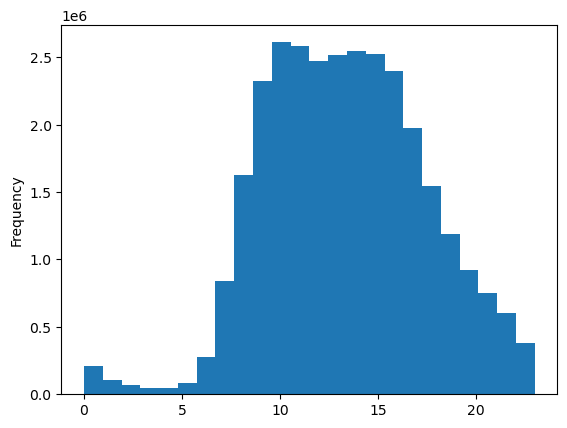

In [8]:
#creating histogram for order_hour_of_day column
hist_orders_hour_of_day = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

After seeing this histogram, we can say that peak hours of Instacart orders between 9am to 4pm. after 5pm there is decline in orders till morning 5-6am.

# Create a bar chart from the “loyalty_flag” column.

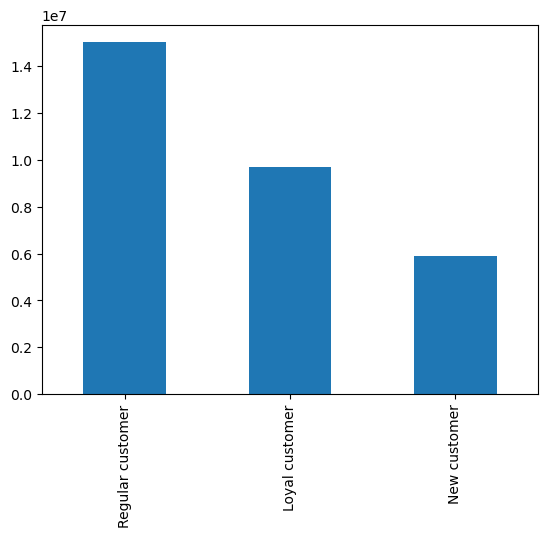

In [9]:
#  bar chart for loyalty flag customers
bar_loyalty_flag = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

Regular customers are at the highest point in Loyalty flag. 

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
# making an accurate subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [11]:
# big is 70% of DF and small is 30%
big = df_ords_prods_cust[dev]

In [13]:
# big is 70% of DF and small is 30%
small = df_ords_prods_cust[~dev]

In [15]:
#checking the count of the whole DF
len(df_ords_prods_cust)

30629741

In [16]:
# checking that the big and small data set = the same number 
len(big)+len (small)

30629741

Both the results are same which means our calculation is right.

In [17]:
#making the small df only contain 2 columns and renaming df_2
df_2 = small[['order_hour_of_day','prices']]

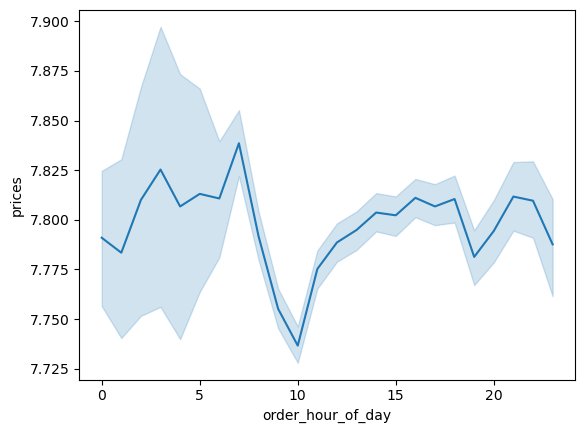

In [18]:
# making a line plot with the small df
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

 I can not see any relation between price of the item purchased and order hour of the day.

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

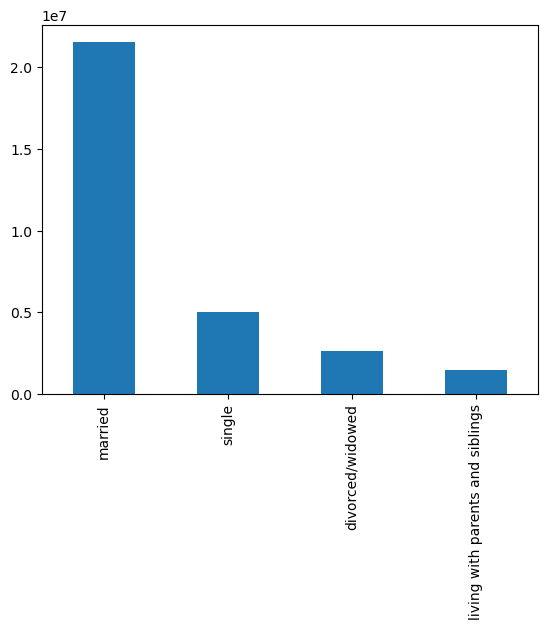

In [23]:
#  bar chart for marital status
bar_marital = df_ords_prods_cust['Marital_status'].value_counts().plot.bar()

The majority for Instacart customers are married people.

In [24]:
#6 making age brackets flags column

df_ords_prods_cust.loc[df_ords_prods_cust['Age'] >= 90, 'Age_bracket'] = '90+'

In [25]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 89) & (df_ords_prods_cust['Age'] >= 80), 'Age_bracket'] = '80-89'

In [26]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 79) & (df_ords_prods_cust['Age'] >= 70), 'Age_bracket'] = '70-79'

In [27]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 69) & (df_ords_prods_cust['Age'] >= 60), 'Age_bracket'] = '60-69'

In [28]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 59) & (df_ords_prods_cust['Age'] >= 50), 'Age_bracket'] = '50-59'

In [29]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 49) & (df_ords_prods_cust['Age'] >= 40), 'Age_bracket'] = '40-49'

In [30]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 39) & (df_ords_prods_cust['Age'] >= 30), 'Age_bracket'] = '30-39'

In [31]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 29) & (df_ords_prods_cust['Age'] >= 20), 'Age_bracket'] = '20-29'

In [32]:
df_ords_prods_cust.loc[(df_ords_prods_cust['Age'] <= 19) & (df_ords_prods_cust['Age'] >= 10), 'Age_bracket'] = '10-19'

In [33]:
#checking the count for the age brackets of IC customers
df_ords_prods_cust['Age_bracket'].value_counts(dropna = False)

40-49    4815900
50-59    4804320
30-39    4795448
20-29    4785372
70-79    4784783
60-69    4717936
10-19     964840
80-89     961142
Name: Age_bracket, dtype: int64

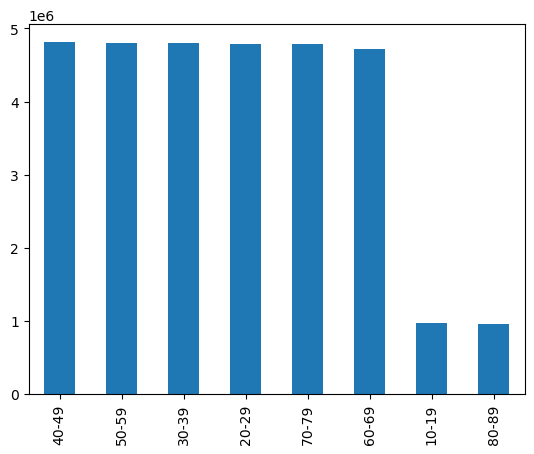

In [34]:
#bar chart on customers age bracket
bar_age_bracket = df_ords_prods_cust['Age_bracket'].value_counts().plot.bar()

Observation: Instacart customers are less likely to be between the age 10-19 and 80-89. others age groups are same.

In [35]:
#taking a look at the Dataframe
df_ords_prods_cust.head()

user_id First Name Last Name  Gender     State  Age Date_of_joining  \
0   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
1   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
2   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
3   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   
4   26711    Deborah  Esquivel  Female  Missouri   48        1/1/2017   

   Number_of_dependants Marital_status  Income  ...     Busiest day  \
0                     3        married  165665  ...  Regularly busy   
1                     3        married  165665  ...  Regularly busy   
2                     3        married  165665  ...  Regularly busy   
3                     3        married  165665  ...  Regularly busy   
4                     3        married  165665  ...  Regularly busy   

     Busiest_days  busiest_period_of_day  max_order  loyalty_flag  \
0    Busiest days            Most orders          8  New customer   
1  Regularly busy            Most orders          8  New customer   
2    Busiest days            Most orders          8  New customer   
3  Regularly busy            Most orders          8  New customer   
4     Least busys            Most orders          8  New customer   

   average_price  spending_flag  median_prior_orders order_frequency_flag  \
0           7.99    Low spender                 19.0     Regular customer   
1           7.99    Low spender                 19.0     Regular customer   
2           7.99    Low spender                 19.0     Regular customer   
3           7.99    Low spender                 19.0     Regular customer   
4           7.99    Low spender                 19.0     Regular customer   

   Age_bracket  
0        40-49  
1        40-49  
2        40-49  
3        40-49  
4        40-49  

[5 rows x 33 columns]

In [36]:
#making a new df with just 2 columns in the small subset
df_3 = small[['Number_of_dependants','Age']]

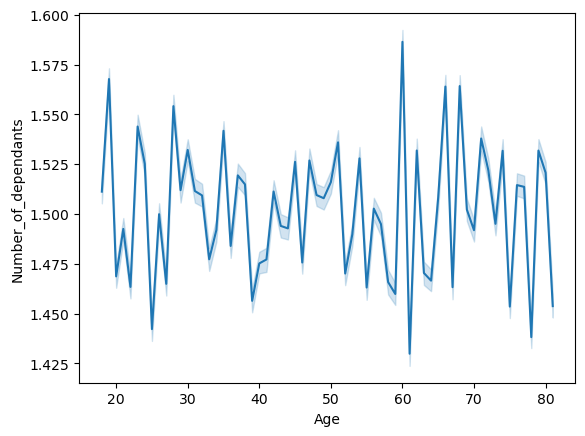

In [37]:
# line chart exploring age and number of dependants
line_age_dependants = sns.lineplot(data = df_3, x = 'Age',y = 'Number_of_dependants')

Observation: i can not see any relation between Age and Number of dependants.

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

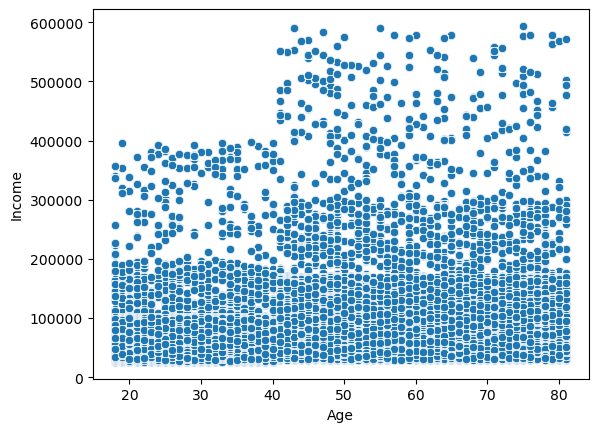

In [38]:
# scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'Age', y = 'Income',data = df_ords_prods_cust)

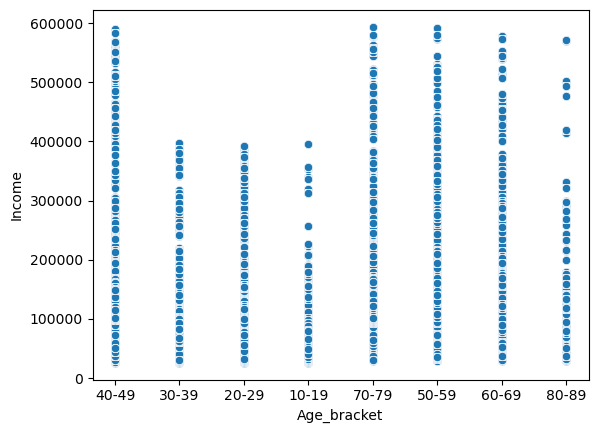

In [43]:
#7 scatterplot of age_bracket and income
scatter_age_bracket_income = sns.scatterplot(x = 'Age_bracket', y = 'Income',data = df_ords_prods_cust)

After the age of 40 , there income is higher approx 40k and higher.

# Export your visualizations as “.png” files in your relevant project folder.


In [44]:
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [45]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [46]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [47]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

In [48]:
bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_bracket.png'))

In [49]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [50]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))